# Count of Lakes

## preparing the matrix

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# a function to plot the map
def plot_map(mymap,title="mymap",label = None):
    # plot the map with tab20c colormap and set the title
    plt.imshow(mymap,cmap = "tab20c")
    plt.title(title)
    
    # add seperating lines between pixels
    plt.hlines(np.linspace(0.5,mymap.shape[0]-0.5,mymap.shape[0]),0-0.5,mymap.shape[1]-0.5,color = [0,0,0])
    plt.vlines(np.linspace(0.5,mymap.shape[1]-0.5,mymap.shape[1]),0-0.5,mymap.shape[0]-0.5,color = [0,0,0])
    
    # if the map is labeled, plot the non-zero labels
    if type(label)!=type(None):
        for i in range(label.shape[0]):
            for j in range(label.shape[1]):
                if label[i,j]!=0:
                    plt.text(j,i,str(int(label[i,j])))
                    
    # show the image
    plt.show()
    
# a method to randomly generate a x*y map
def generate_map(x,y):
    mymap = np.round(np.random.random_sample((x,y)))
    return mymap

Now we can generate a 10*10 matrix and plot it using the defined functions:

[[0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 1. 1. 0. 0. 1. 0. 0. 1.]
 [1. 1. 1. 0. 1. 0. 1. 1. 0. 1.]
 [0. 1. 0. 1. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 1. 0. 1. 0. 1. 1.]
 [0. 0. 0. 1. 1. 0. 1. 0. 1. 0.]
 [1. 1. 0. 1. 0. 0. 1. 1. 1. 1.]
 [0. 1. 1. 0. 1. 1. 0. 0. 0. 1.]
 [0. 0. 1. 1. 0. 0. 1. 1. 1. 1.]
 [0. 1. 1. 1. 0. 1. 1. 0. 0. 0.]]


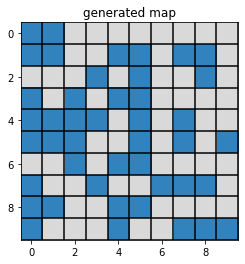

In [38]:
mymap = generate_map(10,10)
print(mymap)
plot_map(mymap,"generated map")

## count the lakes:
The time complexity will be $O(W\bullet H)$ where W and H are the width and height of the map.<br>
The memory complexity of this method will be $O(W)$.<br> 
However, in order to draw the final result, I will keep all the lines in memory. So the memory usage here will be $O(W\bullet H)$ as well.

In [24]:
# a function that takes a label of lake and a dictionary to merge lakes, returns the label of the lake after merging
def final_class(i,merge_dict):
    if i in merge_dict:
        return final_class(merge_dict[i],merge_dict)
    else:
        return i

# This is a function to relabel the map according to the merging information
def relabel(input_map,merge_dict):
    label_dict = dict()
    n_lakes = 0
    output_map = np.zeros(input_map.shape)
    for i in range(input_map.shape[0]):
        for j in range(input_map.shape[1]):
            if input_map[i,j]!=0:
                fc = final_class(input_map[i,j],merge_dict)
                if fc in label_dict:
                    output_map[i,j] = label_dict[fc]
                else:
                    n_lakes+=1
                    label_dict[fc] = n_lakes
                    output_map[i,j] = n_lakes
    return output_map    
    
# a function to count the lakes, returns the number of lake and a relabeled map
def count_lake(mymap):
    
    # a labeled map. This is used to draw the result and is not necessary for counting
    labeled_map = np.zeros(mymap.shape)
    
    # pad the map with land to make counting easier
    mymap = np.pad(mymap,1,constant_values=1,mode='constant')
    
    # here we maintain a variable to restore the labeled previous line
    prev_marking = np.zeros(mymap.shape[1])
    
    # the number of new lakes
    n_lakes = 0
    
    # a dictionary to restore the merging information. It can be maintained to have less than 5 elements.
    # However, to draw the final result,
    merge=dict()
    
    for i in range(mymap.shape[0]-2):
        
        # a variable to label the ith line
        this_marking = np.zeros(mymap.shape[1])
        
        for j in range(mymap.shape[1]-2):
            
            # for each new element, if it is a lake
            if mymap[i+1,j+1]==0:
                
                # for each previously labeled adjacent item
                for item in [prev_marking[j],prev_marking[j+1],prev_marking[j+2],this_marking[j]]:
                    item = final_class(item,merge)
                    
                    #if it is a different lake, 
                    #label the new element if it is 0, otherwise merge the two lakes and restore them into the dict
                    if item!=this_marking[j+1] and item!=0:
                        if this_marking[j+1]==0:
                            this_marking[j+1]=item
                        else:
                            merge[item] = this_marking[j+1]
                
                # if there's no previously labeled adjacent lake, label this as a new lake
                if this_marking[j+1]==0:
                    n_lakes +=1
                    this_marking[j+1]=n_lakes
        
        #prepare for new line
        prev_marking = this_marking
        labeled_map[i]=prev_marking[1:-1]

    n_lakes-=len(merge)
    relabeled_map = relabel(labeled_map,merge)
    
    return n_lakes,relabeled_map

In [39]:
count, labeledmap =count_lake(mymap)

print("The number of Lakes:",count)

print("The labeled map:\n",labeledmap)


The number of Lakes: 7
The labeled map:
 [[1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 2. 2. 0. 3. 3. 0.]
 [0. 0. 0. 2. 0. 2. 0. 0. 3. 0.]
 [2. 0. 2. 0. 2. 2. 0. 0. 0. 0.]
 [2. 2. 2. 2. 0. 2. 0. 4. 0. 0.]
 [2. 2. 2. 0. 0. 2. 0. 4. 0. 5.]
 [0. 0. 2. 0. 2. 2. 0. 0. 0. 0.]
 [6. 0. 0. 2. 0. 0. 2. 2. 2. 0.]
 [6. 6. 0. 0. 2. 2. 0. 0. 0. 0.]
 [6. 0. 0. 0. 2. 0. 0. 7. 7. 7.]]


## Draw the labeled map

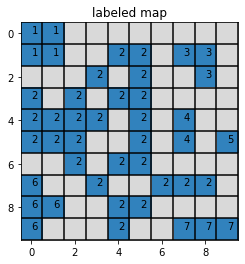

In [40]:
plot_map(mymap,"labeled map",labeledmap)